In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('All Year Olympic Dataset (with 2020 Tokyo Olympics).csv',encoding='utf-8',encoding_errors='replace')

In [3]:
df.head()

,Unnamed: 0,Name,Sex,Age,Team,Games,Year,Season,Sport,Medal
0,0,A Dijiang,M,24.0,China,1992 Summer,1992,Summer,Basketball,0
1,1,A Lamusi,M,23.0,China,2012 Summer,2012,Summer,Judo,0
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,1920 Summer,1920,Summer,Football,0
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900 Summer,1900,Summer,Tug-Of-War,3
4,4,Christine Jacoba Aaftink,F,21.0,Netherlands,1988 Winter,1988,Winter,Speed Skating,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275643 entries, 0 to 275642
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  275643 non-null  int64  
 1   Name        275643 non-null  object 
 2   Sex         275643 non-null  object 
 3   Age         266169 non-null  float64
 4   Team        275643 non-null  object 
 5   Games       275643 non-null  object 
 6   Year        275643 non-null  int64  
 7   Season      275643 non-null  object 
 8   Sport       275643 non-null  object 
 9   Medal       275643 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 21.0+ MB


In [5]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Sex              0
Age           9474
Team             0
Games            0
Year             0
Season           0
Sport            0
Medal            0
dtype: int64

In [6]:
df.isnull().sum()/len(df)*100

Unnamed: 0    0.000000
Name          0.000000
Sex           0.000000
Age           3.437054
Team          0.000000
Games         0.000000
Year          0.000000
Season        0.000000
Sport         0.000000
Medal         0.000000
dtype: float64

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [8]:
df.isnull().sum()/len(df)*100

Unnamed: 0    0.0
Name          0.0
Sex           0.0
Age           0.0
Team          0.0
Games         0.0
Year          0.0
Season        0.0
Sport         0.0
Medal         0.0
dtype: float64

In [9]:
df['Age']=df['Age'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275643 entries, 0 to 275642
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  275643 non-null  int64 
 1   Name        275643 non-null  object
 2   Sex         275643 non-null  object
 3   Age         275643 non-null  int32 
 4   Team        275643 non-null  object
 5   Games       275643 non-null  object
 6   Year        275643 non-null  int64 
 7   Season      275643 non-null  object
 8   Sport       275643 non-null  object
 9   Medal       275643 non-null  int64 
dtypes: int32(1), int64(3), object(6)
memory usage: 20.0+ MB


In [11]:
df.head()

,Unnamed: 0,Name,Sex,Age,Team,Games,Year,Season,Sport,Medal
0,0,A Dijiang,M,24,China,1992 Summer,1992,Summer,Basketball,0
1,1,A Lamusi,M,23,China,2012 Summer,2012,Summer,Judo,0
2,2,Gunnar Nielsen Aaby,M,24,Denmark,1920 Summer,1920,Summer,Football,0
3,3,Edgar Lindenau Aabye,M,34,Denmark/Sweden,1900 Summer,1900,Summer,Tug-Of-War,3
4,4,Christine Jacoba Aaftink,F,21,Netherlands,1988 Winter,1988,Winter,Speed Skating,0


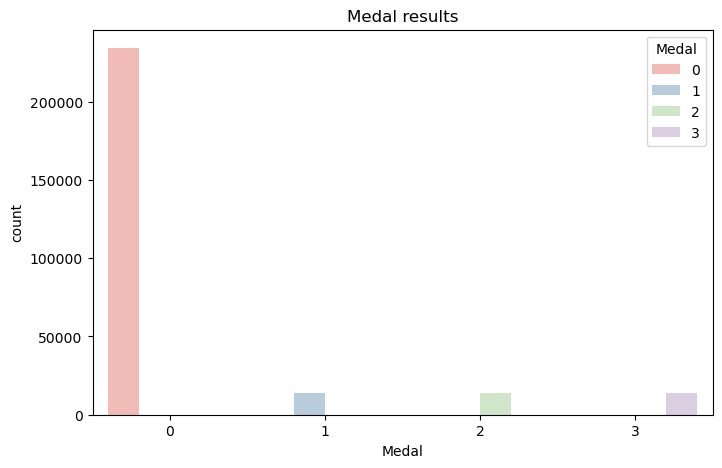

In [12]:
plt.figure(figsize = (8,5))
sns.countplot(x ="Medal", data = df, hue ="Medal", palette ="Pastel1")
plt.title("Medal results")
plt.show()

In [13]:
features=df.iloc[:,0:-1]
target=df.iloc[:,-1]

In [14]:
features.head()

,Unnamed: 0,Name,Sex,Age,Team,Games,Year,Season,Sport
0,0,A Dijiang,M,24,China,1992 Summer,1992,Summer,Basketball
1,1,A Lamusi,M,23,China,2012 Summer,2012,Summer,Judo
2,2,Gunnar Nielsen Aaby,M,24,Denmark,1920 Summer,1920,Summer,Football
3,3,Edgar Lindenau Aabye,M,34,Denmark/Sweden,1900 Summer,1900,Summer,Tug-Of-War
4,4,Christine Jacoba Aaftink,F,21,Netherlands,1988 Winter,1988,Winter,Speed Skating


In [15]:
target.head()

0    0
1    0
2    0
3    3
4    0
Name: Medal, dtype: int64

In [16]:
features[['Age','Year']]

,Age,Year
0,24,1992
1,23,2012
2,24,1920
3,34,1900
4,21,1988
...,...,...
275638,21,2020
275639,22,2020
275640,29,2020
275641,34,2020


In [17]:
col=features.select_dtypes(['int','int']).columns

In [18]:
features[col]

,Unnamed: 0,Age,Year
0,0,24,1992
1,1,23,2012
2,2,24,1920
3,3,34,1900
4,4,21,1988
...,...,...,...
275638,4522,21,2020
275639,4523,22,2020
275640,4524,29,2020
275641,4525,34,2020


In [19]:
from scipy.stats import skew

In [20]:
skew(features['Age'])

1.769205692315055

Unnamed: 0
0.005097049628733674


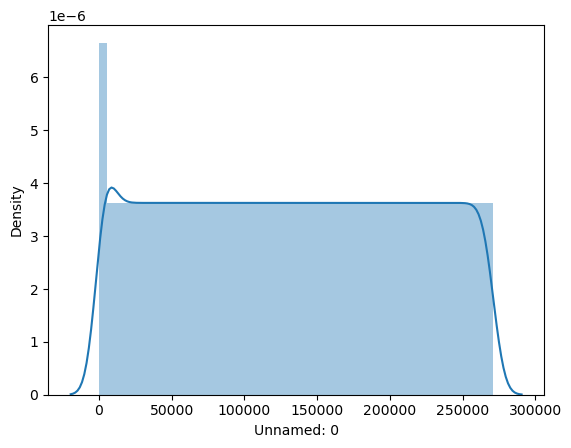

Age
1.769205692315055


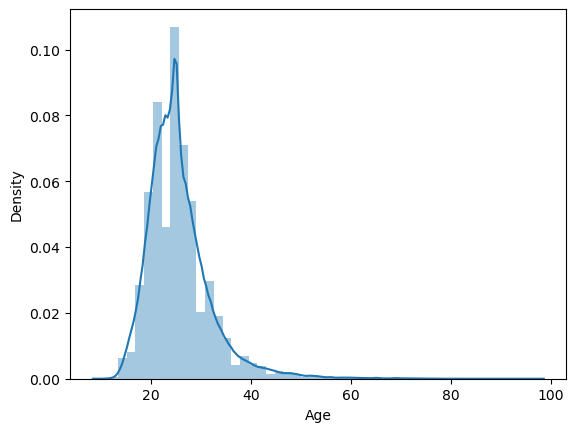

Year
-0.8113430773321004


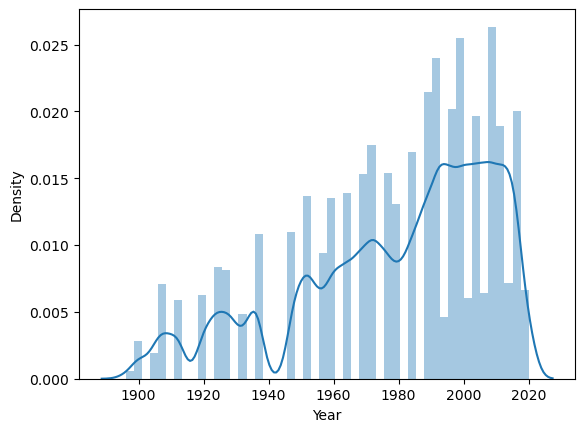

In [21]:
for i in features[col]:
    print(i)
    print(skew(features[i]))
    
    plt.figure()
    sns.distplot(features[i])
    plt.show()

In [22]:
pd.concat([features,target],axis=1).corr().style.background_gradient()

,Unnamed: 0,Age,Year,Medal
Unnamed: 0,1.000000,-0.028500,-0.025990,-0.004590
Age,-0.028500,1.000000,-0.078649,0.026823
Year,-0.025990,-0.078649,1.000000,-0.046247
Medal,-0.004590,0.026823,-0.046247,1.000000


In [23]:
features['Age']=np.log(features['Age'])

In [24]:
skew(features['Age'])

0.5699262384861628

# Encoding

In [25]:
cat_col = features.select_dtypes(object).columns

In [26]:
cat_col

Index(['Name', 'Sex', 'Team', 'Games', 'Season', 'Sport'], dtype='object')

In [27]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
features[cat_col] = oe.fit_transform(features[cat_col])

In [28]:
features

,Unnamed: 0,Name,Sex,Age,Team,Games,Year,Season,Sport
0,0,7.0,2.0,3.178054,198.0,37.0,1992,0.0,8.0
1,1,8.0,2.0,3.135494,198.0,48.0,2012,0.0,39.0
2,2,45517.0,2.0,3.178054,276.0,6.0,1920,0.0,29.0
3,3,30332.0,2.0,3.526361,281.0,1.0,1900,0.0,70.0
4,4,22255.0,0.0,3.044522,712.0,36.0,1988,1.0,62.0
...,...,...,...,...,...,...,...,...,...
275638,4522,136869.0,3.0,3.044522,398.0,51.0,2020,0.0,39.0
275639,4523,136870.0,1.0,3.091042,1117.0,51.0,2020,0.0,74.0
275640,4524,136871.0,1.0,3.367296,1200.0,51.0,2020,0.0,5.0
275641,4525,136872.0,3.0,3.526361,1084.0,51.0,2020,0.0,69.0


# Split the data into training and testing

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,target,test_size = 0.2,random_state = 1)

In [30]:
xtrain

,Unnamed: 0,Name,Sex,Age,Team,Games,Year,Season,Sport
63797,63797,47103.0,2.0,3.135494,750.0,12.0,1932,1.0,62.0
215470,215470,116724.0,2.0,3.258097,1099.0,47.0,2010,1.0,11.0
112985,112985,112923.0,2.0,3.218876,233.0,35.0,1988,0.0,14.0
78341,78341,105355.0,2.0,3.401197,276.0,5.0,1912,0.0,55.0
19736,19736,92732.0,0.0,2.772589,513.0,42.0,2000,0.0,34.0
...,...,...,...,...,...,...,...,...,...
21440,21440,63104.0,2.0,3.401197,416.0,29.0,1976,0.0,5.0
117583,117583,82105.0,2.0,3.258097,1099.0,46.0,2008,0.0,27.0
73349,73349,104967.0,0.0,3.135494,712.0,21.0,1960,0.0,34.0
267336,267336,695.0,2.0,2.944439,407.0,40.0,1996,0.0,5.0


In [31]:
xtest

,Unnamed: 0,Name,Sex,Age,Team,Games,Year,Season,Sport
76465,76465,33013.0,2.0,3.044522,886.0,48.0,2012,0.0,34.0
190007,190007,22036.0,2.0,3.465736,365.0,40.0,1996,0.0,5.0
175434,175434,127800.0,0.0,3.295837,1103.0,37.0,1992,0.0,71.0
72706,72706,61600.0,2.0,3.496508,1025.0,45.0,2006,1.0,19.0
256313,256313,17238.0,2.0,3.091042,173.0,35.0,1988,0.0,21.0
...,...,...,...,...,...,...,...,...,...
31868,31868,57636.0,0.0,2.995732,416.0,25.0,1968,0.0,26.0
194124,194124,64806.0,2.0,2.995732,994.0,7.0,1924,0.0,72.0
133462,133462,35106.0,2.0,3.828641,1138.0,17.0,1952,0.0,54.0
111941,111941,107483.0,2.0,3.433987,953.0,42.0,2000,0.0,72.0


# 1 - Predicting the data using Logistics Regression

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [33]:
# Evaluate the model

In [34]:
from sklearn.metrics import accuracy_score,classification_report
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.849208220718678
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     46816
           1       0.00      0.00      0.00      2778
           2       0.00      0.00      0.00      2784
           3       0.00      0.00      0.00      2751

    accuracy                           0.85     55129
   macro avg       0.21      0.25      0.23     55129
weighted avg       0.72      0.85      0.78     55129



We have achieved an Average Accuracy of 85% which is not that good. Lets see if we can increase this accuracy by hyper tuning

# HPT

In [35]:
logreg = LogisticRegression(solver = "liblinear")
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [36]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.849208220718678
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     46816
           1       0.00      0.00      0.00      2778
           2       0.00      0.00      0.00      2784
           3       0.00      0.00      0.00      2751

    accuracy                           0.85     55129
   macro avg       0.21      0.25      0.23     55129
weighted avg       0.72      0.85      0.78     55129



By using liblinear we get Accuracy of 85%

In [37]:
logreg = LogisticRegression(solver = 'newton-cg')
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [38]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.849208220718678
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     46816
           1       0.00      0.00      0.00      2778
           2       0.00      0.00      0.00      2784
           3       0.00      0.00      0.00      2751

    accuracy                           0.85     55129
   macro avg       0.21      0.25      0.23     55129
weighted avg       0.72      0.85      0.78     55129



By using newton-cg we get Accuracy of 85%

# 2- Predicting the data using Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [40]:
dt = DecisionTreeClassifier()

In [41]:
def mymodel(model):
 model.fit(xtrain,ytrain)
 ypred = model.predict(xtest)
 print(accuracy_score(ytest,ypred))
 print(classification_report(ytest,ypred))
 
 return model

In [42]:
mymodel(dt)

0.8303796549910211
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     46816
           1       0.31      0.34      0.33      2778
           2       0.35      0.37      0.36      2784
           3       0.43      0.46      0.45      2751

    accuracy                           0.83     55129
   macro avg       0.50      0.52      0.51     55129
weighted avg       0.84      0.83      0.83     55129



DecisionTreeClassifier()

By using Decision Tree we get average accuracy of 83% which is not good but lets check whether we get more accurcy by hyper tunning

ploting decision tree

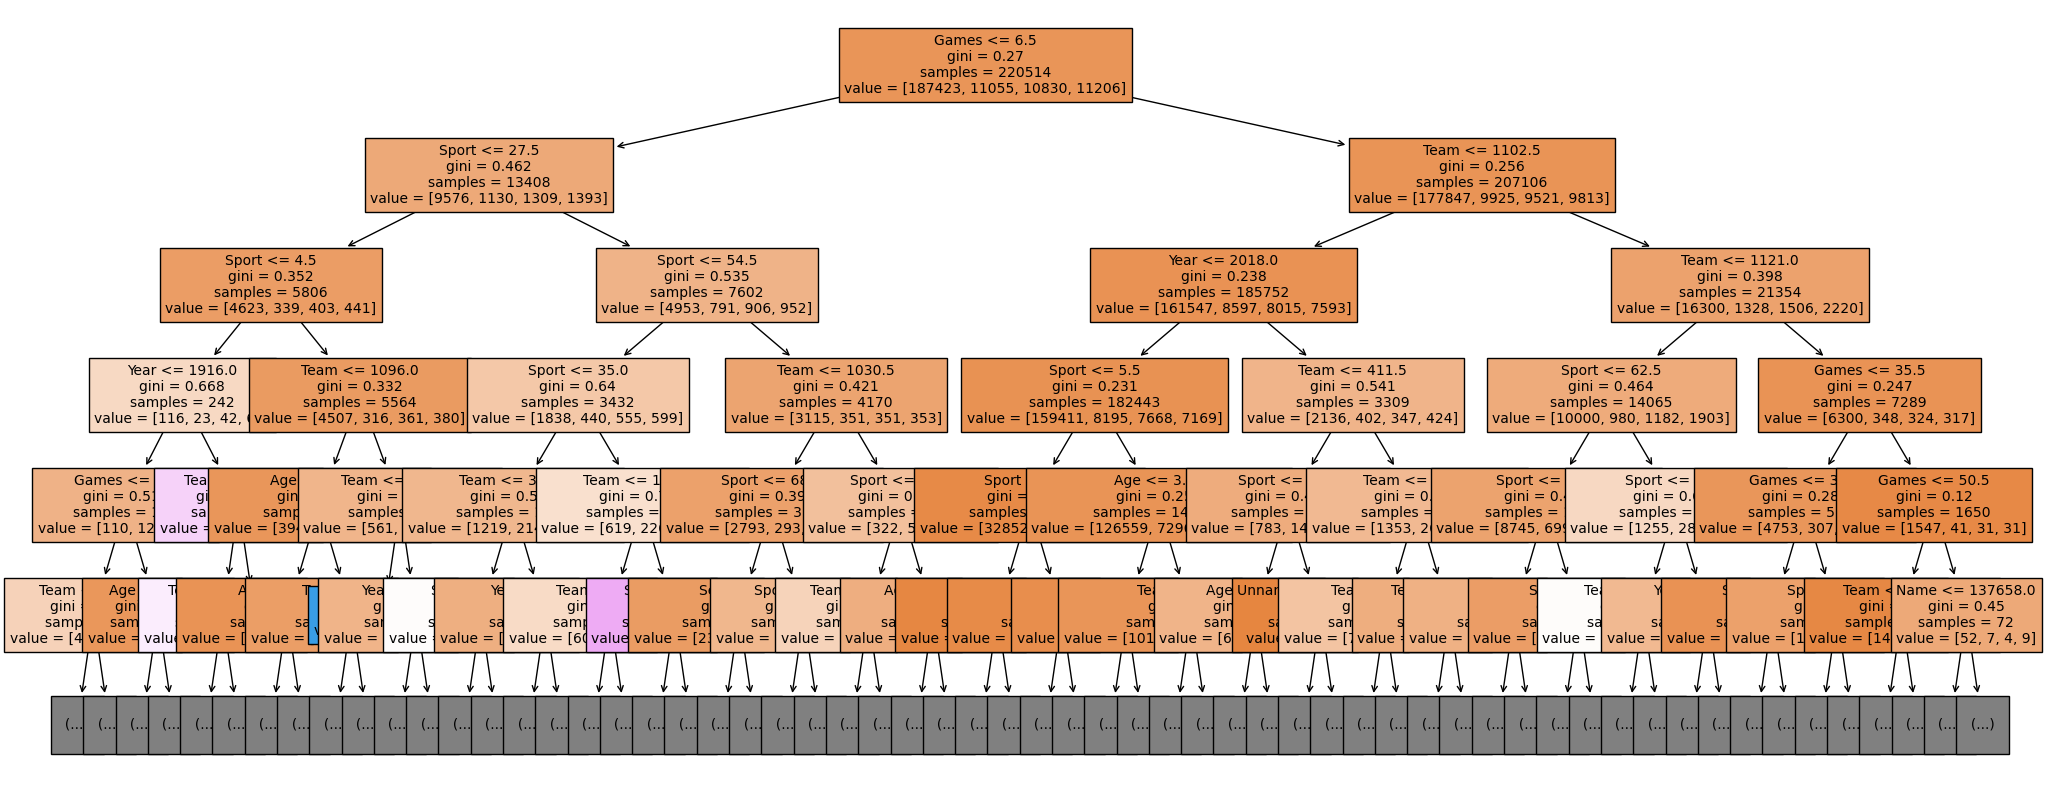

In [43]:
from sklearn import tree
fig,ax=plt.subplots(figsize=(25,10))
chart=tree.plot_tree(dt,max_depth=5,feature_names=features.columns,filled=True,fontsize=10)
plt.savefig('abc.jpg')

checking accuracy of train and test

In [44]:
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :1.0 
 test score : 0.8303796549910211


train acc is high and test acc is low

low bias high varience

# Hyper Tunning the Decision Tree

# i - max_depth

In [45]:
for i in range(20,35):
 dt1 = DecisionTreeClassifier(max_depth = i)
 dt1.fit(xtrain,ytrain)
 ypred = dt1.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 20 accuracy : 0.858096464655626
max_depth = 21 accuracy : 0.8552848772878159
max_depth = 22 accuracy : 0.8537248997805148
max_depth = 23 accuracy : 0.849897513105625
max_depth = 24 accuracy : 0.8477570788514213
max_depth = 25 accuracy : 0.8442199205499827
max_depth = 26 accuracy : 0.8415534473688984
max_depth = 27 accuracy : 0.8394674309347168
max_depth = 28 accuracy : 0.8369279326670174
max_depth = 29 accuracy : 0.8355856264398048
max_depth = 30 accuracy : 0.8340982060258666
max_depth = 31 accuracy : 0.8331549638121497
max_depth = 32 accuracy : 0.8322480001451142
max_depth = 33 accuracy : 0.8322117215984328
max_depth = 34 accuracy : 0.8316131255781893


In [46]:
dt2 = DecisionTreeClassifier(max_depth = 24)
mymodel(dt2)

0.8479747501315097
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     46816
           1       0.37      0.30      0.33      2778
           2       0.41      0.35      0.38      2784
           3       0.47      0.44      0.45      2751

    accuracy                           0.85     55129
   macro avg       0.54      0.51      0.52     55129
weighted avg       0.84      0.85      0.84     55129



DecisionTreeClassifier(max_depth=24)

By using Decision Tree Max Depth function we achive the accuracy of 85%

In [47]:
train = dt2.score(xtrain,ytrain)
test = dt2.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.9631270576924821 
 test score : 0.8479747501315097


# ii - min_samples_split

In [48]:
for i in range(40,80):
    dt3=DecisionTreeClassifier(min_samples_split=i)
    dt3.fit(xtrain,ytrain)
    ypred=dt3.predict(xtest)
    
    ac=accuracy_score(ytest,ypred)
    print(f'min_samples_split{i} accuracy{ac}')

min_samples_split40 accuracy0.8638103357579495
min_samples_split41 accuracy0.8639917284913566
min_samples_split42 accuracy0.8642638175914673
min_samples_split43 accuracy0.8638828928513124
min_samples_split44 accuracy0.8636652215712238
min_samples_split45 accuracy0.8635382466578388
min_samples_split46 accuracy0.8635563859311796
min_samples_split47 accuracy0.8635563859311796
min_samples_split48 accuracy0.8634838288378167
min_samples_split49 accuracy0.8633387146510911
min_samples_split50 accuracy0.8635019681111574
min_samples_split51 accuracy0.8634112717444539
min_samples_split52 accuracy0.8631210433710026
min_samples_split53 accuracy0.8628308149975512
min_samples_split54 accuracy0.8624861688040777
min_samples_split55 accuracy0.8619238513305157
min_samples_split56 accuracy0.86177873714379
min_samples_split57 accuracy0.8617061800504272
min_samples_split58 accuracy0.8618694335104936
min_samples_split59 accuracy0.8617968764171308
min_samples_split60 accuracy0.8618875727838343
min_samples_spl

In [49]:
dt4 = DecisionTreeClassifier(min_samples_split = 78)
mymodel(dt4)

0.8598922527163562
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     46816
           1       0.44      0.13      0.20      2778
           2       0.46      0.15      0.22      2784
           3       0.51      0.26      0.35      2751

    accuracy                           0.86     55129
   macro avg       0.57      0.38      0.42     55129
weighted avg       0.82      0.86      0.83     55129



DecisionTreeClassifier(min_samples_split=78)

In [50]:
train = dt4.score(xtrain,ytrain)
test = dt4.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.8723890546631959 
 test score : 0.8598922527163562


By using Decision Tree Min Sample Split function we achive the accuracy of 86%

# iii - min_samples_leaf

In [51]:
for i in range(301,400):
 dt5 = DecisionTreeClassifier(min_samples_leaf = i)
 dt5.fit(xtrain,ytrain)
 ypred = dt5.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 301 accuracy : 0.8512579586061783
max_depth = 302 accuracy : 0.8512579586061783
max_depth = 303 accuracy : 0.8512579586061783
max_depth = 304 accuracy : 0.8512579586061783
max_depth = 305 accuracy : 0.8512579586061783
max_depth = 306 accuracy : 0.8512579586061783
max_depth = 307 accuracy : 0.8512579586061783
max_depth = 308 accuracy : 0.8512579586061783
max_depth = 309 accuracy : 0.8512579586061783
max_depth = 310 accuracy : 0.8512579586061783
max_depth = 311 accuracy : 0.8512579586061783
max_depth = 312 accuracy : 0.8512579586061783
max_depth = 313 accuracy : 0.8512579586061783
max_depth = 314 accuracy : 0.8512579586061783
max_depth = 315 accuracy : 0.8512579586061783
max_depth = 316 accuracy : 0.8512579586061783
max_depth = 317 accuracy : 0.8512579586061783
max_depth = 318 accuracy : 0.8513123764262004
max_depth = 319 accuracy : 0.8513123764262004
max_depth = 320 accuracy : 0.8513123764262004
max_depth = 321 accuracy : 0.8513123764262004
max_depth = 322 accuracy : 0.85131

In [52]:
dt6 = DecisionTreeClassifier(min_samples_leaf = 379)
mymodel(dt6)

0.8511128444194526
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     46816
           1       0.00      0.00      0.00      2778
           2       0.00      0.00      0.00      2784
           3       0.46      0.09      0.15      2751

    accuracy                           0.85     55129
   macro avg       0.33      0.27      0.27     55129
weighted avg       0.75      0.85      0.79     55129



DecisionTreeClassifier(min_samples_leaf=379)

In [53]:
train = dt6.score(xtrain,ytrain)
test = dt6.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.8517826532555756 
 test score : 0.8511128444194526


By using Decision Tree min_samples_leaf function we achive the accuracy of 85%

# 3 - Predicting the data using Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(xtrain,ytrain)
ypred = rc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     46816
           1       0.42      0.22      0.29      2778
           2       0.44      0.25      0.32      2784
           3       0.55      0.36      0.44      2751

    accuracy                           0.86     55129
   macro avg       0.58      0.45      0.49     55129
weighted avg       0.83      0.86      0.84     55129



By using Random Forest we get 86% of accuracy.

# 4. Predicting the data using Boosting

# i - Adaboost Classifier

In [55]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred = ada.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     46816
           1       0.00      0.00      0.00      2778
           2       0.00      0.00      0.00      2784
           3       0.25      0.00      0.00      2751

    accuracy                           0.85     55129
   macro avg       0.27      0.25      0.23     55129
weighted avg       0.73      0.85      0.78     55129



By using AdaBoost Classifier we get 85% of accuracy

# ii - Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred = gbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     46816
           1       1.00      0.00      0.00      2778
           2       0.69      0.00      0.01      2784
           3       0.57      0.01      0.02      2751

    accuracy                           0.85     55129
   macro avg       0.78      0.25      0.24     55129
weighted avg       0.84      0.85      0.78     55129



By using Gradient Boosting algorithm we get 85% of accuracy

# iii - XG Boosting

In [57]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred = xgb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93     46816
           1       0.64      0.03      0.06      2778
           2       0.70      0.06      0.11      2784
           3       0.69      0.17      0.28      2751

    accuracy                           0.86     55129
   macro avg       0.73      0.32      0.34     55129
weighted avg       0.84      0.86      0.81     55129



By using XG Boost algorithm we get 86% of accuracy

# 5. Predicting the data using Encemble Learning

# i - Bagging

In [59]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     46816
           1       0.00      0.00      0.00      2778
           2       0.00      0.00      0.00      2784
           3       0.00      0.00      0.00      2751

    accuracy                           0.85     55129
   macro avg       0.21      0.25      0.23     55129
weighted avg       0.72      0.85      0.78     55129



By using Bagging Classifier on Logostic Regression we get 85% of accuracy which is not good for prediction

In [60]:
bg = BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     46816
           1       0.45      0.30      0.36      2778
           2       0.48      0.32      0.39      2784
           3       0.56      0.42      0.48      2751

    accuracy                           0.87     55129
   macro avg       0.60      0.50      0.54     55129
weighted avg       0.85      0.87      0.85     55129



By using Bagging Classifier on Decision Tree we get 87% of accuracy.`

# ii-Voting

In [61]:
models =[]
models.append(("lr",LogisticRegression()))
models.append(("dt",DecisionTreeClassifier()))

In [62]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models) # estimators --> model name
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     46816
           1       0.00      0.00      0.00      2778
           2       0.00      0.00      0.00      2784
           3       0.00      0.00      0.00      2751

    accuracy                           0.85     55129
   macro avg       0.21      0.25      0.23     55129
weighted avg       0.72      0.85      0.78     55129



In [63]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models,voting='soft') # estimators --> model na
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     46816
           1       0.32      0.34      0.33      2778
           2       0.35      0.37      0.36      2784
           3       0.43      0.47      0.45      2751

    accuracy                           0.83     55129
   macro avg       0.50      0.52      0.51     55129
weighted avg       0.84      0.83      0.83     55129



By using Voting Classifier we get 85% And 83% of of accuracy

# Conclusion

# Based on the above accuracy scores, we should go ahead with decision tree , random forest or extream gradient boosting (XG Boost),Encemble learning(Bagging)